# Autoencoders
Autoencoders are a class of neural network that attempt to recreate the input
as their target using back-propagation. An autoencoder consists of two parts; an **encoder** and a **decoder**. The encoder will read the input and compress it to a compact representation, and the decoder will read the compact representation and recreate the input from it. In other words, the autoencoder tries to learn the identity function by minimizing the reconstruction error. They have an inherent capability to learn
a compact representation of data. They are at the center of deep belief networks
and find applications in image reconstruction, clustering, machine translation,
and much more.

This exercise aims to test your understanding of autoencoder architecture, and how it can be used to denoise an image. We will build a convolutional autoencoder. Combining your knowledge of a Vanilla/Denoising Autoencoder and Convolutional Networks.

The notebook has five Exercises followed by an optional exercise.

In [2]:
#@title Import Modules

import numpy as np
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D


np.random.seed(11)
tf.random.set_seed(11)

## AutoEncoder  Architecture
The number of hidden units in the autoencoder is typically less than the number of input (and output) units. This forces the encoder to learn a compressed representation of the input, which the decoder reconstructs. If there is a structure in the input data in the form of correlations between input features, then the autoencoder will discover some of these correlations, and end up learning a low-dimensional representation of the data similar to that learned using principal component analysis (PCA).

Once trained
* We can discard **decoder** and use **Encoder** to optain a compact representation of input.
* We can cascade Encoder to a classifier.

The encoder and decoder components of an autoencoder can be implemented using either dense, convolutional, or recurrent networks, depending on the kind of data that is being modeled.

Below we define an encoder and a decoder using Convolutional layers. Both consist of three convolutional layers. Each layer in Encoder has a corresponding layer in decoder, thus in this case it is like three autoencoders stacked over each other. This is also called **Stacked Autoencoders**

![](https://drive.google.com/uc?id=1UzM67qf1VE_8akrCgiohKjUIHoO_2x4E)



In [4]:
#@title Encoder
class Encoder(K.layers.Layer):
    def __init__(self, filters):
        super(Encoder, self).__init__()
        self.conv1 = Conv2D(filters=filters[0], kernel_size=3, strides=1, activation='relu', padding='same')
        self.conv2 = Conv2D(filters=filters[1], kernel_size=3, strides=1, activation='relu', padding='same')
        self.conv3 = Conv2D(filters=filters[2], kernel_size=3, strides=1, activation='relu', padding='same')
        self.pool = MaxPooling2D((2, 2), padding='same')


    def call(self, input_features):
        x = self.conv1(input_features)
        #print("Ex1", x.shape)
        x = self.pool(x)
        #print("Ex2", x.shape)
        x = self.conv2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.pool(x)
        return x


In [5]:
#@title Decoder
class Decoder(K.layers.Layer):
    def __init__(self, filters):
        super(Decoder, self).__init__()
        self.conv1 = Conv2D(filters=filters[2], kernel_size=3, strides=1, activation='relu', padding='same')
        self.conv2 = Conv2D(filters=filters[1], kernel_size=3, strides=1, activation='relu', padding='same')
        self.conv3 = Conv2D(filters=filters[0], kernel_size=3, strides=1, activation='relu', padding='valid')
        self.conv4 = Conv2D(1, 3, 1, activation='sigmoid', padding='same')
        self.upsample = UpSampling2D((2, 2))

    def call(self, encoded):
        x = self.conv1(encoded)
        #print("dx1", x.shape)
        x = self.upsample(x)
        #print("dx2", x.shape)
        x = self.conv2(x)
        x = self.upsample(x)
        x = self.conv3(x)
        x = self.upsample(x)
        return self.conv4(x)

## Denoising Autoencoder

When we train the autoencoder, we can train it directly on the raw images or we can add noise to the input images while training. When the autoencoder is trained on noisy data, it gets an even interesting property--it can reconstruct noisy images. In other words--you give it an image with noise and it will remove the noise from it.

## Exercise 1:
In this exercise we will train the stacked autoencoder in four steps:
* In [Step 1](#step1) choose the noise = 0
* Complete the [Step 2](#step2)
* In the [Step 3](#step3) choose filters as [16, 32, 64] for Encoder and [64, 32, 16] for Decoder.
* Perform [Step 4](#step4) for batch size of 64 and 10 epochs
* Reflect on the plotted images what do you see?

**Answer 1** (Double click to edit)*italicized text*

<a id='step1'></a>
### Step 1:
Read the dataset, process it for noise = 0

In [9]:
#@title Dataset Reading and Processing
Noise = 0.2 #@param {type:"slider", min:0, max:1, step:0.1}
(x_train, _), (x_test, _) = K.datasets.mnist.load_data()

x_train = x_train / 255.
x_test = x_test / 255.

x_train = np.reshape(x_train, (len(x_train),28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise = Noise
x_train_noisy = x_train + noise * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0, 1)
x_test_noisy = np.clip(x_test_noisy, 0, 1)

x_train_noisy = x_train_noisy.astype('float32')
x_test_noisy = x_test_noisy.astype('float32')

<a id='another_cell'></a>
### Step 2

You need to complete the code below. We will be using the Encoder and Decoder architectures that we have defined above to build an autoencoder. In the code below replace `...` with right code.

Epoch 1/10
(None, 28, 28, 1)
(None, 4, 4, 16)
(None, 28, 28, 1)
(None, 28, 28, 1)
(None, 4, 4, 16)
(None, 28, 28, 1)
235/235 [==============================] - ETA: 0s - loss: 0.1997(None, 28, 28, 1)
(None, 4, 4, 16)
(None, 28, 28, 1)
235/235 [==============================] - 7s 14ms/step - loss: 0.1997 - val_loss: 0.1357
Epoch 2/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1236 - val_loss: 0.1139
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1108 - val_loss: 0.1057
Epoch 4/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1039 - val_loss: 0.1003
Epoch 5/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0995 - val_loss: 0.0968
Epoch 6/10
235/235 [==============================] - 3s 15ms/step - loss: 0.0961 - val_loss: 0.0939
Epoch 7/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0935 - val_loss: 0.0917
Epoch 8/10
235/235 [==============================] - 3s 13ms/step - 

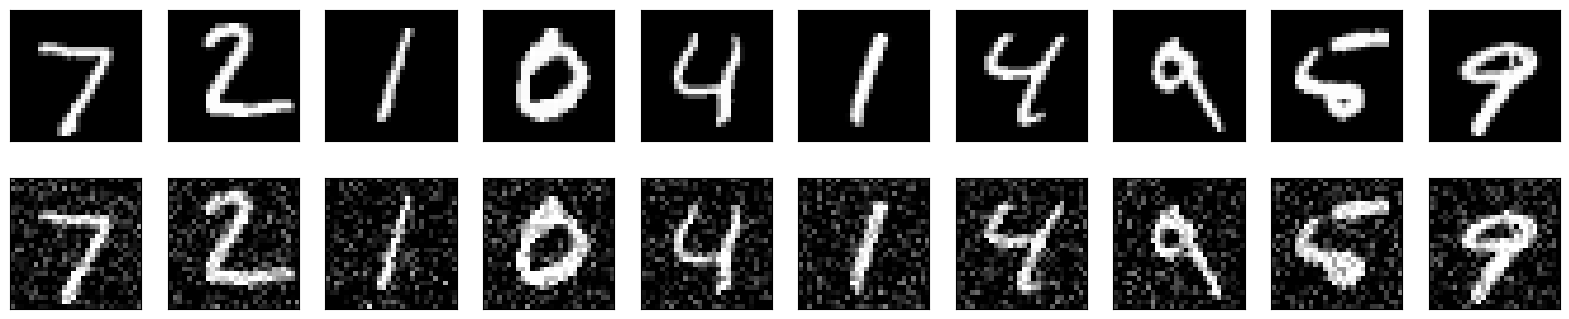

In [10]:
class Autoencoder(K.Model):
    def __init__(self, filters_encoder, filters_decoder):
        super(Autoencoder, self).__init__()
        self.loss = []
        self.encoder = Encoder(filters_encoder)
        self.decoder = Decoder(filters_decoder)

    def call(self, input_features):
        print(input_features.shape)
        encoded = self.encoder(input_features)
        print(encoded.shape)
        reconstructed = self.decoder(encoded)
        print(reconstructed.shape)
        return reconstructed


#filters_encoder=[16,32,64]
#filters_encoder=[16,32,64]
filters_encoder=[64,32,16]
#filters_decoder=[64,32,16]
#filters_decoder=[16,32,64]
filters_decoder=[16,32,64]
BATCH_SIZE = 256
EPOCHS = 10

# instantiate model as Autoencoder instance
model = Autoencoder(filters_encoder=filters_encoder, filters_decoder=filters_decoder)
# compile model by configuring loss and optimiser
model.compile(loss='binary_crossentropy', optimizer='adam')
# train model on the noisy dataset for a given number of epochs (iterations on the dataset)
loss = model.fit(x_train_noisy, # input dataset
                x_train, # original dataset (labels)
                # validation data
                validation_data=(x_test_noisy, x_test),
                # number of epochs/iterations
                epochs=EPOCHS,
                #  number of samples per gradient update
                batch_size=BATCH_SIZE)


number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noisy
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(x_test_noisy[index].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Exercise 2:
In this exercise we will make only one change, in step 3 choose filters as: `[16, 32, 64]` for both Encoder and Decoder.
 Try training the Autoencoder. What happens? Why do you think it is so?

In [8]:
Value loss was pretty much the same(0.079 vs 0.08) as the earlier combination of filters. Number of trainable parameters are same in bothe cases.

## Exercise 3:

Now we will introduce noise of 0.2 in the training dataset. Train an autoencoder with filters [64,32,16] for encoder and [16,32,64] for decoder and observe the reconstrucred images.


What do you find? Is the autoencoder able to recognize noisy digits?


**Answer 3** (Double click to edit)
Value loss was higher(0.088), Autoencoder was able to identify the digits but with some sparsity(pixelation).

## Exercise 4:

Let us be more adventurous with the same Encoder-Decoder architecture, we increase the noise and observe the reconstrucred images.


What do you find? Till what noise value is the autoencoder able to reconstruct images? Till what noise level you (human) can recognize the digits in the noisy image.


**Answer 4** (Double click to edit)
With increasing Noise level, it became difficult to reconstruct images. Also the time of execution increased.

Human- 0.7
Autoencoder- 0.6

<a id='step3'></a>

### Step 3:

We have built Convolutional Autoencoder. That is both Encoder and Decoder are buit using Convolutional layers. Below you need to select

In [12]:
#@title Select Filters for Encoder & Decoder
filter_encoder_0 = 16 #@param {type:"slider", min:8, max:256, step:2}
filter_encoder_1 = 32 #@param {type:"slider", min:8, max:256, step:2}
filter_encoder_2 = 64 #@param {type:"slider", min:8, max:256, step:2}

filters_en = [filter_encoder_0,filter_encoder_1,filter_encoder_2]


filter_decoder_0 = 16 #@param {type:"slider", min:8, max:256, step:2}
filter_decoder_1 = 32 #@param {type:"slider", min:8, max:256, step:2}
filter_decoder_2 = 64 #@param {type:"slider", min:8, max:256, step:2}

filters_de = [filter_decoder_0,filter_decoder_1,filter_decoder_2]


model = Autoencoder(filters_en, filters_de)

model.compile(loss='binary_crossentropy', optimizer='adam')


### Step 4:
Choose the appropriate batch_size and epochs

In [22]:
#@title Train the model
BATCH_SIZE = 252 #@param {type:"slider", min:32, max:2000, step:10}
EPOCHS = 50 #@param {type:"slider", min:1, max:100, step:1}
batch_size = BATCH_SIZE
max_epochs = EPOCHS
loss = model.fit(x_train_noisy,
                x_train,
                validation_data=(x_test_noisy, x_test),
                epochs=max_epochs,
                batch_size=batch_size)


Epoch 1/50
239/239 [==============================] - 3s 11ms/step - loss: 0.0721 - val_loss: 0.0725
Epoch 2/50
239/239 [==============================] - 3s 12ms/step - loss: 0.0720 - val_loss: 0.0727
Epoch 3/50
239/239 [==============================] - 2s 9ms/step - loss: 0.0720 - val_loss: 0.0722
Epoch 4/50
239/239 [==============================] - 2s 9ms/step - loss: 0.0719 - val_loss: 0.0724
Epoch 5/50
239/239 [==============================] - 2s 10ms/step - loss: 0.0720 - val_loss: 0.0721
Epoch 6/50
239/239 [==============================] - 2s 10ms/step - loss: 0.0720 - val_loss: 0.0723
Epoch 7/50
239/239 [==============================] - 3s 11ms/step - loss: 0.0719 - val_loss: 0.0721
Epoch 8/50
239/239 [==============================] - 2s 9ms/step - loss: 0.0720 - val_loss: 0.0722
Epoch 9/50
239/239 [==============================] - 2s 10ms/step - loss: 0.0719 - val_loss: 0.0722
Epoch 10/50
239/239 [==============================] - 2s 9ms/step - loss: 0.0719 - val_loss: 

(10000, 28, 28, 1)
(10000, 4, 4, 64)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 4, 4, 64)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 4, 4, 64)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 4, 4, 64)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 4, 4, 64)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 4, 4, 64)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 4, 4, 64)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 4, 4, 64)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 4, 4, 64)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 4, 4, 64)
(10000, 28, 28, 1)


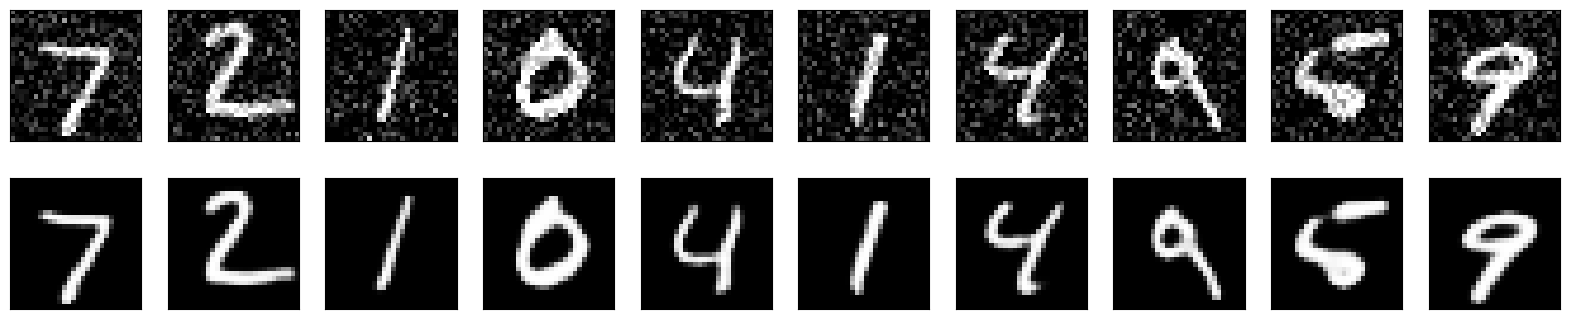

In [23]:
#@title Reconstructed images
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test_noisy[index].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(tf.reshape(model(x_test_noisy)[index], (28, 28)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Optional Exercise
Construct a Sparse Autoencoder with Dense layer/s, train it on noisy images as before. See how the hidden dimensions influence the reconstruction. Which is one is better for denoising, the convolution Encoder/Decoder or Dense Encoder/Decoder, why?